In [1]:
import LDAQ
import threading
import numpy as np

# import matplotlib.pyplot as plt

In [2]:
device = LDAQ.micro_epsilon.Scanner(idle_time=4900)

In [28]:
acq = LDAQ.micro_epsilon.MELaserScanner(
    "me", device
)

In [6]:
device.turn_off_laser()

In [29]:
acq.run_acquisition(run_time=2.)

(0,)
Added an empty profile, proceed with caution
(0,)
Added an empty profile, proceed with caution


In [34]:
device._buffer_arrays["W"]

array([                  0,                   0,                   0,
           140703618371728,                 632,       2382252193456,
             2382241032800,       2382252193968,       2382241023776,
             2382252184688,       2382252190704,       2382251921520,
             2382251932464,       2382251922800,       2382251933424,
             2382251923952,       2382251929520,       2382251930288,
             2382241037408,       2382251923504,       2382251926128,
             2382251921072,       2382251921968,       2382251932656,
             2382251924016,     140703619554560,       2382251927280,
             2382251922416,     140703619554560,       2382241032416,
           140703619554560,       2382251924976,       2382241023344,
             2382251927664,       2382241025024,       2382241030112,
             2382251920176,       2382251919280,     140703619554560,
           140703619554560,       2382251920624,       2382241023296,
             2382251

In [14]:
aa = acq.get_measurement_dict()

In [18]:
aa["data"]

np.float64(0.0)

In [38]:
device.data_buffer

[]

In [17]:
acq.clear_buffer()

In [31]:
acq.terminate_data_source()

In [39]:
aa = acq.get_measurement_dict()

In [40]:
aa["data"].shape

(40, 4480)

In [41]:
aa["data"]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
num_t = data.shape[0]
profile = data.reshape((num_t, 7, 640))

In [28]:
profile[0,0]

array([ 2.8474e+01,  2.8382e+01,  2.8294e+01,  2.8204e+01,  2.8110e+01,
        2.8018e+01,  2.7924e+01,  2.7834e+01,  2.7752e+01,  2.7668e+01,
        2.7584e+01,  2.7494e+01,  2.7400e+01,  2.7310e+01,  2.7218e+01,
        2.7130e+01,  2.7044e+01,  2.6964e+01,  2.6880e+01,  2.6792e+01,
        2.6700e+01,  2.6608e+01,  2.6518e+01,  2.6428e+01,  2.6340e+01,
        2.6252e+01,  2.6162e+01,  2.6072e+01,  2.5982e+01,  2.5896e+01,
        2.5810e+01,  2.5722e+01,  2.5634e+01,  2.5546e+01,  2.5454e+01,
        2.5366e+01,  2.5276e+01,  2.5190e+01,  2.5104e+01,  2.5018e+01,
        2.4930e+01,  2.4838e+01,  2.4748e+01,  2.4658e+01,  2.4568e+01,
        2.4476e+01,  2.4388e+01,  2.4302e+01,  2.4218e+01,  2.4134e+01,
        2.4048e+01,  2.3962e+01,  2.3876e+01,  2.3790e+01,  2.3700e+01,
        2.3612e+01,  2.3522e+01,  2.3432e+01,  2.3342e+01,  2.3252e+01,
        2.3162e+01,  2.3072e+01,  2.2984e+01,  2.2898e+01,  2.2810e+01,
        2.2724e+01,  2.2636e+01,  2.2548e+01,  2.2458e+01,  2.23

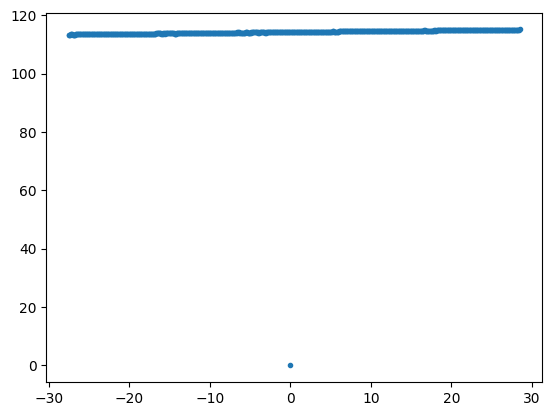

In [31]:
plt.plot(profile[0,0], profile[0,1], '.')

In [17]:
num_t = data.shape[0]
data.reshape(())

(80, 4480)